In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("DSL-StrongPasswordData.csv")

In [3]:
X = data.iloc[:,3:]
y = data.iloc[:,0]

In [4]:
y_onehot = pd.get_dummies(y).values

print(y_onehot.shape)

(20400, 51)


In [5]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout,Activation
import random

In [6]:
random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.4, random_state=0, stratify=y_onehot)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12240, 31)
(12240, 51)
(8160, 31)
(8160, 51)


In [7]:
model = Sequential()

model.add(Dense(units =51,input_shape=(31,),activation='softmax'))



In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 51)                1632      
Total params: 1,632
Trainable params: 1,632
Non-trainable params: 0
_________________________________________________________________


In [9]:
#model.compile(loss='mean_squared_error',optimizer='adam', metrics = ['accuracy'])
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,epochs=100,batch_size=20,validation_split=0.2)

Train on 9792 samples, validate on 2448 samples
Epoch 1/100
9792/9792 [==============================] - 1s 144us/sample - loss: 3.9221 - accuracy: 0.0190 - val_loss: 3.9029 - val_accuracy: 0.0245
Epoch 2/100
9792/9792 [==============================] - 1s 111us/sample - loss: 3.8966 - accuracy: 0.0249 - val_loss: 3.8831 - val_accuracy: 0.0208
Epoch 3/100
9792/9792 [==============================] - 1s 113us/sample - loss: 3.8753 - accuracy: 0.0265 - val_loss: 3.8664 - val_accuracy: 0.0237
Epoch 4/100
9792/9792 [==============================] - 1s 111us/sample - loss: 3.8571 - accuracy: 0.0311 - val_loss: 3.8518 - val_accuracy: 0.0319
Epoch 5/100
9792/9792 [==============================] - 1s 112us/sample - loss: 3.8411 - accuracy: 0.0416 - val_loss: 3.8385 - val_accuracy: 0.0376
Epoch 6/100
9792/9792 [==============================] - 1s 111us/sample - loss: 3.8266 - accuracy: 0.0488 - val_loss: 3.8262 - val_accuracy: 0.0417
Epoch 7/100
9792/9792 [==============================] - 1

9792/9792 [==============================] - 1s 113us/sample - loss: 3.4395 - accuracy: 0.3539 - val_loss: 3.4598 - val_accuracy: 0.3391
Epoch 55/100
9792/9792 [==============================] - 1s 116us/sample - loss: 3.4341 - accuracy: 0.3574 - val_loss: 3.4545 - val_accuracy: 0.3431
Epoch 56/100
9792/9792 [==============================] - 2s 188us/sample - loss: 3.4287 - accuracy: 0.3579 - val_loss: 3.4493 - val_accuracy: 0.3464
Epoch 57/100
9792/9792 [==============================] - 2s 218us/sample - loss: 3.4234 - accuracy: 0.3610 - val_loss: 3.4441 - val_accuracy: 0.3489
Epoch 58/100
9792/9792 [==============================] - 1s 142us/sample - loss: 3.4181 - accuracy: 0.3612 - val_loss: 3.4391 - val_accuracy: 0.3484
Epoch 59/100
9792/9792 [==============================] - 1s 142us/sample - loss: 3.4129 - accuracy: 0.3648 - val_loss: 3.4340 - val_accuracy: 0.3501
Epoch 60/100
9792/9792 [==============================] - 1s 115us/sample - loss: 3.4078 - accuracy: 0.3676 - val

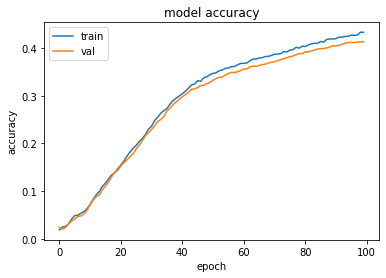

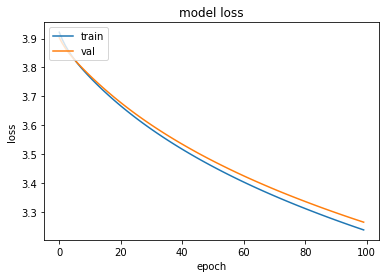

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
model.evaluate(X_test, y_test,verbose=False)[1]

0.42034313